# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
# student details 1: Hila.s- 7462
# student details 2: Odelya.d-7565


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal: To help write the notebook, explain the steps, and build the regression model.

Prompt1: "Write a simple explanation about the goal of predicting house prices."
Propmpt2: how to open google kolab 
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

בעבודה זו עסקנו בבעיה של למידה מונחית מסוג חיזוי ערך מספרי, שמטרתה להעריך את ערכו החציוני של בית באזורים שונים במדינת קליפורניה. מאגר הנתונים כולל מאפיינים דמוגרפיים וסביבתיים כמו הכנסה חציונית, גיל ממוצע של מבנים, מספר חדרים ממוצע, צפיפות מגורים, ומיקום גיאוגרפי לפי קווי רוחב ואורך. במהלך העבודה נבחנו שיטות שונות לעיבוד המאפיינים, ובוצע תהליך של אימון מודלים מתמטיים כדי לבנות מערכת חיזוי מדויקת לערך הבתים באזורים שלא הופיעו בשלבי הלמידה.

## Part 2 - Initial Preparations 
You could add as many code cells as needed

בחלק זה טוענים את קובצי הנתונים של הלמידה (train) והבדיקה (test), מציגים את חמש השורות הראשונות מכל אחד מהם, ומפיקים טבלה סטטיסטית מתארת לנתוני האימון (כגון ממוצע, חציון וסטיית תקן). בנוסף, יוצרים לפחות שלוש המחשות חזותיות (כמו תרשימי התפלגות, תרשים פיזור ומפת קשרים בין מאפיינים), כדי להבין את מבנה הנתונים, לזהות תבניות ולהניח בסיס לבחירת מודלים מתאימים בהמשך.



===== TRAIN SAMPLE =====
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  
===== TEST SAMPLE =====
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.

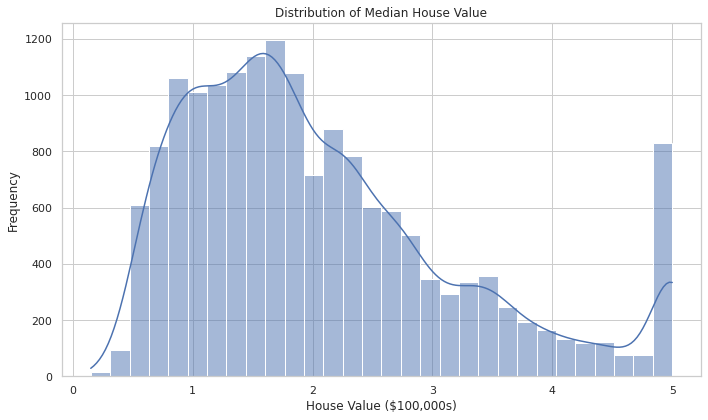

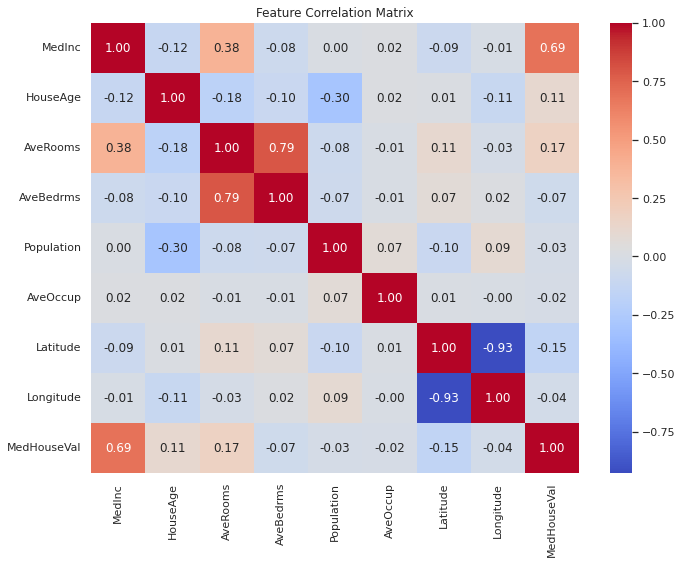

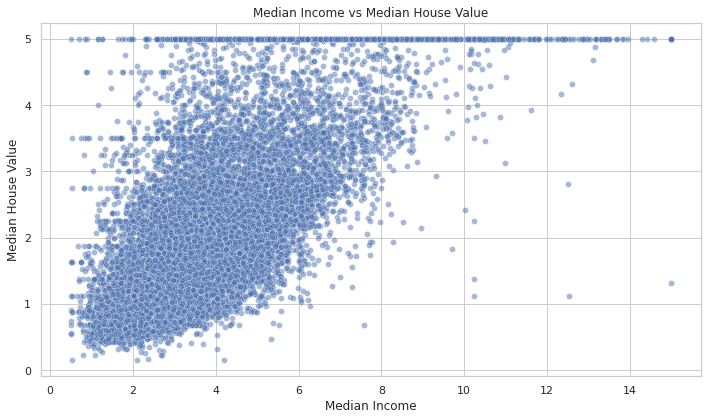

===== HOUSE VALUE BY INCOME RANGE =====
  Income Range  Mean House Value  Count  Standard Deviation
0       (0, 2]          1.120692   1959            0.722433
1       (2, 4]          1.681638   8080            0.845996
2       (4, 6]          2.448371   4610            0.941791
3       (6, 8]          3.437877   1324            0.938982
4      (8, 10]          4.441383    304            0.685881
5     (10, 16]          4.807259    235            0.618910


In [5]:
# Part 2: Data Loading and EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and test datasets
train_df = pd.read_csv("housing_train.csv")
test_df = pd.read_csv("housing_test.csv")

# Show the first 5 rows of each dataset
print("===== TRAIN SAMPLE =====")
print(train_df.head())
print("===== TEST SAMPLE =====")
print(test_df.head())

# Descriptive statistics table
print("===== DESCRIPTIVE STATISTICS =====")
print(train_df.describe())

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($100,000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 2: Correlation heatmap (fixed for pandas < 2.0)
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Plot 3: Scatter plot of income vs house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=train_df, alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

# Table 4: Mean house value by income bins
income_bins = pd.cut(train_df["MedInc"], bins=[0, 2, 4, 6, 8, 10, 16])
income_summary = train_df.groupby(income_bins)["MedHouseVal"].agg(["mean", "count", "std"]).reset_index()
income_summary.columns = ["Income Range", "Mean House Value", "Count", "Standard Deviation"]
print("===== HOUSE VALUE BY INCOME RANGE =====")
print(income_summary)



## Part 3 - Experiments
You could add as many code cells as needed

בחלק זה בוצעו ניסויים במטרה לבחור את השיטה הטובה ביותר לחיזוי. נבחנו כמה מודלים של חיזוי בשילוב שיטות שונות לעיבוד מאפיינים, תוך שימוש בחיפוש רשת ובשיטת תיקוף צולב (5 קיפולים). לכל שילוב חושב מדד דיוק (למשל r²), והתקבלה טבלה מסכמת עם התוצאות. נבחר השילוב שהשיג את התוצאה הגבוהה ביותר, ונבחנו השפעות של שינוי פרמטרים, בחירת מאפיינים, והוספת מאפיינים חדשים – על מנת לשפר את ביצועי המודל.



In [6]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load data
train_df = pd.read_csv("housing_train.csv")
X = train_df.drop("MedHouseVal", axis=1)
y = train_df["MedHouseVal"]

# Define scorer
r2 = make_scorer(r2_score)

# Define experiments (pipelines + param grids)
experiments = {
    "Ridge + Scaler": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model", Ridge())
        ]),
        "params": {
            "model__alpha": [0.1, 1.0, 10.0]
        }
    },
    "Ridge + Scaler + Poly2": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("model", Ridge())
        ]),
        "params": {
            "model__alpha": [0.1, 1.0]
        }
    },
    "RandomForest + Scaler": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model", RandomForestRegressor(random_state=42))
        ]),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [5, 10]
        }
    },
    "RandomForest + SelectKBest": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_regression, k=6)),
            ("model", RandomForestRegressor(random_state=42))
        ]),
        "params": {
            "model__n_estimators": [50],
            "model__max_depth": [5, 10]
        }
    }
}

# Run experiments
results = []

for name, cfg in experiments.items():
    grid = GridSearchCV(
        estimator=cfg["pipeline"],
        param_grid=cfg["params"],
        scoring=r2,
        cv=5
    )
    grid.fit(X, y)
    best_model = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_

    results.append({
        "Model": name,
        "Best R²": round(best_score, 4),
        "Best Parameters": best_params if best_params else "Default"
    })

# Show results
results_df = pd.DataFrame(results)
print("===== Final Experiment Table – Cross Validation, Models, Feature Engineering =====")
from IPython.display import display
display(results_df.sort_values(by="Best R²", ascending=False).reset_index(drop=True))



===== Final Experiment Table – Cross Validation, Models, Feature Engineering =====


,Model,Best R²,Best Parameters
0,RandomForest + Scaler,0.7743,"{'model__max_depth': 10, 'model__n_estimators'..."
1,RandomForest + SelectKBest,0.7570,"{'model__max_depth': 10, 'model__n_estimators'..."
2,Ridge + Scaler,0.6048,{'model__alpha': 10.0}
3,Ridge + Scaler + Poly2,0.4644,{'model__alpha': 1.0}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

לאחר שנמצא השילוב הטוב ביותר של מודל, עיבוד מאפיינים ופרמטרים בניסויים שבוצעו, חלק זה כולל אימון מחדש של אותו שילוב נבחר על כל נתוני האימון המלאים. מטרת האימון הסופי היא לבנות מודל יציב ומדויק ככל האפשר, תוך ניצול מלא של המידע הקיים לפני ביצוע תחזיות על הנתונים החדשים.



In [7]:
# Part 4 – Final Training on Full Train Set

# Step 1: Find best model from results table
best_model_name = results_df.sort_values(by="Best R²", ascending=False).iloc[0]["Model"]

# Step 2: Re-run GridSearchCV on best config using all train data
final_grid = GridSearchCV(
    estimator=experiments[best_model_name]["pipeline"],
    param_grid=experiments[best_model_name]["params"],
    cv=5,
    scoring='r2'
)

# Step 3: Fit best model to full training set
final_grid.fit(X, y)
final_model = final_grid.best_estimator_

print(" Final model retrained successfully.")
print("Model:", best_model_name)
print("Best Parameters:", final_grid.best_params_)


 Final model retrained successfully.
Model: RandomForest + Scaler
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}


## Part 5 - Apply on test and show model performance estimation


### חלק 5 – חיזוי והערכת איכות

בשלב זה השתמשנו במודל הסופי שאומן בחלק 4, כדי לבצע חיזוי על קבוצת הבדיקה (test set).  
הפעלנו עליו את אותם שלבי עיבוד מוקדם (Feature Engineering), את אותו מודל למידה, ואת אותם ערכי Hyperparameters שנבחרו בתהליך הניסויים (Cross Validation).  

ביצענו חיזוי על כל הדוגמאות בקובץ הבדיקה, והצגנו את חמש התחזיות הראשונות.  
מכיוון שקובץ הבדיקה כלל גם את ערכי המטרה (MedHouseVal), ביצענו גם הערכת איכות של המודל באמצעות מדד R² – בדיוק כפי שביצענו בתהליך ה־Validation.

השלב הזה מאפשר להבין כיצד המודל הכללי צפוי להתנהג על נתונים חדשים שלא נראו באימון.


In [8]:
# Part 5 – Prediction and Model Evaluation

import pandas as pd
from sklearn.metrics import r2_score

# Load the test set
test_df = pd.read_csv("housing_test.csv")

# Drop target column if it exists
if "MedHouseVal" in test_df.columns:
    y_test = test_df["MedHouseVal"]
    test_df = test_df.drop("MedHouseVal", axis=1)
else:
    y_test = None

# Align test features with training features
test_df = test_df[X.columns]

# Predict on test data
test_predictions = final_model.predict(test_df)

# Display first 5 predictions
print("First 5 predictions on test set:")
for i in range(5):
    print(f"Prediction {i+1}: {test_predictions[i]:.4f}")

# Evaluate model if ground truth exists
if y_test is not None:
    r2 = r2_score(y_test, test_predictions)
    print(f"\nR² score on test set: {r2:.4f}")
else:
    print("\nMedHouseVal column not found in test set. Skipping R² evaluation.")



First 5 predictions on test set:
Prediction 1: 3.3331
Prediction 2: 2.5584
Prediction 3: 2.4257
Prediction 4: 1.3106
Prediction 5: 1.2140

R² score on test set: 0.7965
